# Лекции 30 октября  и 6 ноября 2017

Дополнительные сведения в [заметке](https://www.evernote.com/l/AQLiRsgy5BVP-4bAUiOA1GCoTpBKxQ4jQy0) 

In [1]:
%%latex

Тут не настоящий \LaTeX{} 



Выключная формула: \[ \frac{1}{2}\]

<IPython.core.display.Latex object>

## Картинки из LaTeX на языке TikZ

нужно еще установить программы ImageMagic и pdf2svg и внести директории  с командами в PATH


В командной строке

```bash
conda install -c conda-forge tikzmagic 
```

In [2]:
%load_ext tikzmagic

ModuleNotFoundError: No module named 'tikzmagic'

In [3]:
# можно получить справку %%tikz?

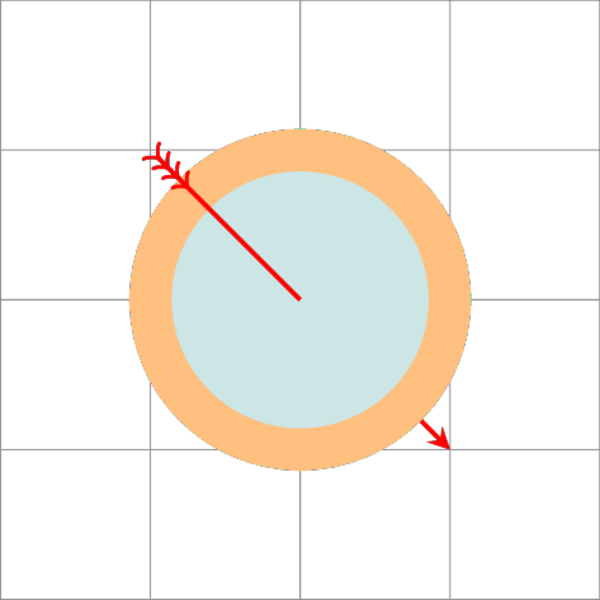

In [4]:
%%tikz  --size 600,800 
    % ";" в конце каждой команды TikZ. 
    % help lines -- это стиль линий сетки
\draw [help lines] (0,0) grid (4,4) ; 

    % -stealth стиль стрелки как у самолета Stealth
\draw [red, -stealth, thick] (2,2) -- (3,1) ;  

    %  заполнение (fill) круга 50% синего 20% зеленого,
    % а цвет линии (draw) смесь 50% оранжевого и прозрачного
    % линия имеет толщину (line width) 8 пунктов
\path [fill=blue!50!green!20, draw=orange!50, line width=8pt] (2,2) circle (1) ; 
 
    % >>>>- Это стиль "хвостовика" линии  
\draw [red, >>>>-, thick] (1,3) -- (2,2) ;




# Шаблоны Jinja2

## Простые шаблоны

Официальная документация по шаблонам <http://jinja.pocoo.org/docs/2.9/templates/>

In [3]:
import jinja2


text = """{#
 Джинжевский коментарий
 тут
#} 
Привет, {{name}}!"""

text = "Привет, {{name}}!"
template = jinja2.Template(text)

print(template.render(name="Илья"))
print(template.render(name="Серёга"))

text = "Привет, {{name}} {{second_name}}!"
template = jinja2.Template(text)
print(template.render(name="Сергей",second_name="Борисович"))

Привет, Илья!
Привет, Серёга!
Привет, Сергей Борисович!


In [4]:

text = '{% for item in ["мудрый", "проницательный", "прекрасный"] %}Здравствуй, {{ item + " " + name }}!\n{% endfor %}'
template = jinja2.Template(text)

print(template.render(name="Илья"))
print(template.render(name="Сергей"))
print(template.render(name="Ерофей Павлович!"))


Здравствуй, мудрый Илья!
Здравствуй, проницательный Илья!
Здравствуй, прекрасный Илья!

Здравствуй, мудрый Сергей!
Здравствуй, проницательный Сергей!
Здравствуй, прекрасный Сергей!

Здравствуй, мудрый Ерофей Павлович!!
Здравствуй, проницательный Ерофей Павлович!!
Здравствуй, прекрасный Ерофей Павлович!!



### Наследование шаблонов

В применениях Jinja2 для  генерации веб-страниц или документов LaTeX хочется иметь возможность варьировать только отдельные блоки внутри базового шаблона, оставляя основу неизменной. А шаблоны, которые строятся на основе базового расширяют его (**extents**). При написании расширяющих базу шаблонов нужно только переопределять отдельные блоки базового шаблона, а общую часть уже писать не нужно.


В базовом шаблоне мы обьявляем блоки 

In [4]:
%%writefile base_templ.txt
<<<<<<<<<<<<<**********BEGIN*DEMO*DOCUMENT*********>>>>>>>>>>>>
дата:
    {{publication_date}}

название:
    {% block title%}
    Статья на неопределнную тему
    {% endblock %}

авторы: 
    {% block authors%}
    Илья Кочергин
    {% endblock %}

<<<<<<<<<<<<<***********END*DEMO*DOCUMENT**********>>>>>>>>>>>>


Overwriting base_templ.txt


In [7]:
import jinja2 
import os
import datetime

current_date = datetime.datetime.date(datetime.datetime.now())
jinja_env = jinja2.Environment( 
    trim_blocks = True,
    autoescape = False,
    loader = jinja2.FileSystemLoader(os.path.abspath('.'))
)    
base_templ = jinja_env.get_template('base_templ.txt')
    
print(base_templ.render(publication_date=current_date))

<<<<<<<<<<<<<**********BEGIN*DEMO*DOCUMENT*********>>>>>>>>>>>>
дата:
    2018-11-23

название:
        Статья на неопределнную тему
    
авторы: 
        Илья Кочергин
    
<<<<<<<<<<<<<***********END*DEMO*DOCUMENT**********>>>>>>>>>>>>


* * * 


В "дочернем" шаблоне мы переопределяем только те блоки, которые нас не устраивают в базовом шаблоне. На имя файла с базовым шаблоном  мы ссылаемся при помощи команды ```{% extends "base_templ.txt" %}```

* * *

в этом примере нас устраивает в базовом шаблоне все, кроме названия

In [8]:
%%writefile  child1_templ.txt
{% extends "base_templ.txt" %}

{% block title%}
Особенности гидрофобных форм жизни
{% endblock %}


Overwriting child1_templ.txt


In [10]:
child1_templ = jinja_env.get_template('child1_templ.txt')

print(child1_templ.render(publication_date="Ноябрь 2017"))

<<<<<<<<<<<<<**********BEGIN*DEMO*DOCUMENT*********>>>>>>>>>>>>
дата:
    Ноябрь 2017

название:
    Особенности гидрофобных форм жизни

авторы: 
        Илья Кочергин
    
<<<<<<<<<<<<<***********END*DEMO*DOCUMENT**********>>>>>>>>>>>>


In [11]:
%%writefile  child2_templ.txt
{% extends "base_templ.txt" %}

{% block title%}
Использование цепей Маркова в генераторах бреда. 
    ({% for i in range(1,4) %}Часть {{i}} {%endfor%})
{% endblock %}

{% block authors %}
{{ super() }}
        Василий Пупкин   
{% endblock%}


Overwriting child2_templ.txt


In [10]:
child2_templ = jinja_env.get_template('child2_templ.txt')

print(child2_templ.render(publication_date="Октябрь 2017"))

<<<<<<<<<<<<<**********BEGIN*DEMO*DOCUMENT*********>>>>>>>>>>>>
дата:
    Октябрь 2017

название:
    Использование цепей Маркова в генераторах бреда. 
    (Часть 1 Часть 2 Часть 3 )

авторы: 
        Илья Кочергин
    
        Василий Пупкин   

<<<<<<<<<<<<<***********END*DEMO*DOCUMENT**********>>>>>>>>>>>>


## Шаблоны LaTeX

Пример из [статьи](http://eosrei.net/articles/2015/11/latex-templates-python-and-jinja2-generate-pdfs)

В этом примере символы, сигнализирующие шаблонизатору, что он должен по-другому интерпретировать заключённые в них конструкции, определены так, чтобы  


```python
from jinja2 import Template

# tex-like delimiters
latex_jinja_env = jinja2.Environment(
    block_start_string = '\BLOCK{',
    block_end_string = '}',
    variable_start_string = '\VAR{',
    variable_end_string = '}',
    comment_start_string = '\#{',
    comment_end_string = '}',
    line_statement_prefix = '%%',
    line_comment_prefix = '%#',
    trim_blocks = True,
    autoescape = False,
    loader = jinja2.FileSystemLoader(os.path.abspath('.'))
)

template = latex_jinja_env.get_template('jinja-test.tex')
print(template.render(section1='Long Form', section2='Short Form'))
```

In [12]:
%%writefile jinja-test.tex

% !TeX program=xelatex

\documentclass{article}
   \usepackage{xltxtra} 
   \usepackage{fontspec}
    \defaultfontfeatures{Renderer=Basic, Ligatures=TeX} %лигатуры работают в basic режиме
    \setmainfont{Times New Roman}
    \setsansfont{Arial}
    \setmonofont{Courier New}
    \newfontfamily{\cyrillicfonttt}{Courier New} 
    \newcommand{\lsstyle}{\addfontfeature{LetterSpace=12.0}}
    \usepackage[english,russian]{babel}
    \usepackage{xcolor}
    \usepackage{graphicx}
    \usepackage{verbatim} 

\begin{document}
\section{Пример}
Пример документа с использованием \LaTeX, Python, и Jinja.

% This is a regular LaTeX comment
\section{\VAR{section1var}}
\#{This is a long-form Jinja comment}
\begin{itemize}
\BLOCK{ for x in range(0, 8) }
  \item Counting: \VAR{x}
\BLOCK{ endfor }
\end{itemize}

\section{\VAR{section2var}}
%# This is a short-form Jinja comment
\begin{itemize}
%% for x in range(0, 3)
  \item Counting: \VAR{x}
%% endfor
\end{itemize}

\end{document}
The above results in test.tex:

\documentclass{article}
\begin{document}
\section{Example}
An example document using \LaTeX, Python, and Jinja.

% This is a regular LaTeX comment
\section{Long Form}
\begin{itemize}
  \item Counting: 0
  \item Counting: 1
  \item Counting: 2
\end{itemize}

\section{Short Form}

\begin{itemize}
  \item Counting: 0
  \item Counting: 1
  \item Counting: 2
\end{itemize}

\end{document}

Overwriting jinja-test.tex


In [13]:
os.path.abspath('.')

'C:\\Users\\koch\\Documents\\python'

In [14]:
import jinja2 
import os

# tex-like delimiters
latex_jinja_env = jinja2.Environment(
    block_start_string = '\BLOCK{',
    block_end_string = '}',
    variable_start_string = '\VAR{',
    variable_end_string = '}',
    comment_start_string = '\#{',
    comment_end_string = '}',
    line_statement_prefix = '%%',
    line_comment_prefix = '%#',
    trim_blocks = True,
    autoescape = False,
    loader = jinja2.FileSystemLoader(os.path.abspath('.'))
)

template = latex_jinja_env.get_template('jinja-test.tex')

print(template.render(section1var='Long Form', section2var='Short Form') )
# with open("example.tex","w",encoding="utf-8") as tfile:  # DEFAULT encoding="CP1251"  !!!
#     print(template.render(section1='Long Form', section2='Short Form'), file=tfile)


% !TeX program=xelatex

\documentclass{article}
   \usepackage{xltxtra} 
   \usepackage{fontspec}
    \defaultfontfeatures{Renderer=Basic, Ligatures=TeX} %лигатуры работают в basic режиме
    \setmainfont{Times New Roman}
    \setsansfont{Arial}
    \setmonofont{Courier New}
    \newfontfamily{\cyrillicfonttt}{Courier New} 
    \newcommand{\lsstyle}{\addfontfeature{LetterSpace=12.0}}
    \usepackage[english,russian]{babel}
    \usepackage{xcolor}
    \usepackage{graphicx}
    \usepackage{verbatim} 

\begin{document}
\section{Пример}
Пример документа с использованием \LaTeX, Python, и Jinja.

% This is a regular LaTeX comment
\section{Long Form}
\begin{itemize}
  \item Counting: 0
  \item Counting: 1
  \item Counting: 2
  \item Counting: 3
  \item Counting: 4
  \item Counting: 5
  \item Counting: 6
  \item Counting: 7
\end{itemize}

\section{Short Form}

\begin{itemize}
  \item Counting: 0
  \item Counting: 1
  \item Counting: 2
\end{itemize}

\end{document}
The above results in test.t

In [15]:
!chcp 1251
!type example.tex

’ҐЄгй п Є®¤®ў п бва ­Ёж : 1251
\documentclass[varwidth=true]{standalone}
   \usepackage{xltxtra} 
   \usepackage{fontspec}
  %  \defaultfontfeatures{Renderer=Basic, Ligatures=TeX} %Р»РёРіР°С‚СѓСЂС‹ СЂР°Р±РѕС‚Р°СЋС‚ РІ basic СЂРµР¶РёРјРµ
    \setmainfont{Times New Roman}
    \setsansfont{Arial}
    \setmonofont{Courier New}
    \newfontfamily{\cyrillicfonttt}{Courier New} 
    \newcommand{\lsstyle}{\addfontfeature{LetterSpace=12.0}}
    \usepackage[english,russian]{babel}
    \usepackage{xcolor}
    \usepackage{graphicx}
    \usepackage{verbatim} 

\begin{document}
\section{РџСЂРёРјРµСЂ}
РџСЂРёРјРµСЂ РґРѕРєСѓРјРµРЅС‚Р° СЃ РёСЃРїРѕР»СЊР·РѕРІР°РЅРёРµРј \LaTeX, Python, Рё Jinja.

% This is a regular LaTeX comment
\section{Long Form}
\begin{itemize}
  \item Counting: 0
  \item Counting: 1
  \item Counting: 2
\end{itemize}

\section{Short Form}

\begin{itemize}
  \item Counting: 0
  \item Counting: 1
  \item Counting: 2
\end{itemize}

\end{document}


In [16]:
!xelatex example.tex

This is XeTeX, Version 3.14159265-2.6-0.99999 (TeX Live 2018/W32TeX) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./example.tex
LaTeX2e <2018-04-01> patch level 2
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(c:/texlive/2018/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2018/03/26 v1.3a Class to compile TeX sub-files stan
dalone
(c:/texlive/2018/texmf-dist/tex/latex/tools/shellesc.sty)
(c:/texlive/2018/texmf-dist/tex/generic/oberdiek/ifluatex.sty)
(c:/texlive/2018/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(c:/texlive/2018/texmf-dist/tex/generic/ifxetex/ifxetex.sty)
(c:/texlive/2018/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(c:/texlive/2018/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(c:/texlive/2018/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(c:/texlive/2018/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(c:/texlive/2018/texmf-dist/tex/latex/standalone/standalone.cfg)
(c:/texlive/2018/texmf-dist/tex/late

In [30]:
%%writefile standalone_templ_example2.tex
\documentclass[varwidth=true]{standalone}
   \usepackage{xltxtra} 
   \usepackage{fontspec}
  %  \defaultfontfeatures{Renderer=Basic, Ligatures=TeX} %лигатуры работают в basic режиме
    \setmainfont{Times New Roman}
    \setsansfont{Arial}
    \setmonofont{Courier New}
    \newfontfamily{\cyrillicfonttt}{Courier New} 
    \newcommand{\lsstyle}{\addfontfeature{LetterSpace=12.0}}
    \usepackage[english,russian]{babel}
    \usepackage{xcolor}
    \usepackage{graphicx}
    \usepackage{verbatim} 

\begin{document}
\section{Пример}
Пример документа с использованием \LaTeX, Python, и Jinja.

% This is a regular LaTeX comment
\section{\VAR{section1}}
\#{This is a long-form Jinja comment}
\begin{itemize}
\BLOCK{ for x in range(0, 3) }
  \item Counting: \VAR{x}
\BLOCK{ endfor }
\end{itemize}

\section{\VAR{section2}}
%# This is a short-form Jinja comment
\begin{itemize}
%% for x in range(0, 3)
  \item Counting: \VAR{x}
%% endfor
\end{itemize}

\end{document}


Writing standalone_templ_example2.tex


In [31]:

# tex-like delimiters
latex_jinja_env = jinja2.Environment(
    block_start_string = '\BLOCK{',
    block_end_string = '}',
    variable_start_string = '\VAR{',
    variable_end_string = '}',
    comment_start_string = '\#{',
    comment_end_string = '}',
    line_statement_prefix = '%%',
    line_comment_prefix = '%#',
    trim_blocks = True,
    autoescape = False,
    loader = jinja2.FileSystemLoader(os.path.abspath('.'))
)

template = latex_jinja_env.get_template('standalone_templ_example2.tex')
with open("example.tex","w",encoding="utf-8") as tfile:  # DEFAULT encoding="CP1251"  !!!
    print(template.render(section1='Long Form', section2='Short Form'), file=tfile)

### nbconvert-совместимые разделители 

```python
environment.block_start_string = "((*"
environment.block_end_string = "*))"
environment.variable_start_string = "((("
environment.variable_end_string = ")))"
environment.comment_start_string = "((="
environment.comment_end_string = "=))"

```

In [17]:
latex_nbconvert_env = jinja2.Environment(
    block_start_string = "((*",
    block_end_string = "*))",
    variable_start_string = "(((",
    variable_end_string = ")))",
    comment_start_string = "((=",
    comment_end_string = "=))",
    trim_blocks = True,
    autoescape = False,
    loader = jinja2.FileSystemLoader(os.path.abspath('.'))
)


In [18]:
%%writefile base_xelatex_standalone_template.tex
((* block docclass *))
\documentclass[varwidth=true]{standalone}
((* endblock *))

((* block preambula *))
   \usepackage{xltxtra} 
   \usepackage{fontspec}
%   \defaultfontfeatures{Renderer=Basic, Ligatures=TeX} %лигатуры работают в basic режиме
    \setmainfont{Times New Roman}
    \setsansfont{Arial}
    \setmonofont{Courier New}
    \newfontfamily{\cyrillicfonttt}{Courier New} 
    \newcommand{\lsstyle}{\addfontfeature{LetterSpace=12.0}}
    \usepackage[english,russian]{babel}
    \usepackage{xcolor}
    \usepackage{graphicx}
    \usepackage{verbatim} 
((* endblock *))

\begin{document}
((* block content *))
((* endblock *))
\end{document}

Overwriting base_xelatex_standalone_template.tex


In [19]:
%%writefile child_xelatex_standalone_template.tex
((* extends "base_xelatex_standalone_template.tex" *))

((*block content*))
Документ \LaTeX{} про (((tema)))
((* endblock*))

Overwriting child_xelatex_standalone_template.tex


In [20]:
template2 = latex_nbconvert_env.get_template('child_xelatex_standalone_template.tex')
with open("example2.tex","w",encoding="utf-8") as tfile:  # DEFAULT encoding="CP1251"  !!!
    print(template2.render(tema="стояние на реке Дон"), file=tfile)

In [21]:
!xelatex example2.tex

This is XeTeX, Version 3.14159265-2.6-0.99999 (TeX Live 2018/W32TeX) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./example2.tex
LaTeX2e <2018-04-01> patch level 2
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(c:/texlive/2018/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2018/03/26 v1.3a Class to compile TeX sub-files stan
dalone
(c:/texlive/2018/texmf-dist/tex/latex/tools/shellesc.sty)
(c:/texlive/2018/texmf-dist/tex/generic/oberdiek/ifluatex.sty)
(c:/texlive/2018/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(c:/texlive/2018/texmf-dist/tex/generic/ifxetex/ifxetex.sty)
(c:/texlive/2018/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(c:/texlive/2018/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(c:/texlive/2018/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(c:/texlive/2018/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(c:/texlive/2018/texmf-dist/tex/latex/standalone/standalone.cfg)
(c:/texlive/2018/texmf-dist/tex/lat

### Показ картинки из PDF

Из [рецепта](https://stackoverflow.com/questions/19470099/view-pdf-image-in-an-ipython-notebook)

In [27]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

In [35]:
PDF("example2.pdf",size=(350,90))

### Строковая переменная в роли текстового файла

In [24]:
import pandas as pd
from io import StringIO

tab_data_csv_text = """
Продукт;Прирост
сеялки;-30
веялки;-10
сенокосилки;30
комбайны;25
трактора;-10
"""

tab_data=pd.read_csv(StringIO(tab_data_csv_text),sep=";")


In [25]:
tab_data

,Продукт,Прирост
0,сеялки,-30
1,веялки,-10
2,сенокосилки,30
3,комбайны,25
4,трактора,-10


### Пример: Таблица  LaTeX и documentclass article

In [31]:
%%writefile child_xelatex_article_template.tex
((* extends "base_xelatex_standalone_template.tex" *))

((*block docclass*))
\documentclass[12pt,a4paper]{article}
((* endblock*))

((*block preambula*))
(((super())))
\author{Илья Кочергин}
\title{Таблица сельхозтехники по шаблону}
\date{\today}
((* endblock*))


((*block content*))
\maketitle

\section{Прирост выпуска сельскохозяйственной техники}



\begin{tabular}{||l|r||}
\hline
категория товаров & прирост продаж \\
\hline
((* for i in range(data|count) *))
(((data.iloc[i,0] ))) & (((data.iloc[i,1] ))) \\
((* endfor *))
\hline
\end{tabular}
((* endblock*))

Overwriting child_xelatex_article_template.tex


In [32]:
template3 = latex_nbconvert_env.get_template('child_xelatex_article_template.tex')
with open("example3article.tex","w",encoding="utf-8") as tfile:  # DEFAULT encoding="CP1251"  !!!
    print(template3.render(data=tab_data), file=tfile)

In [33]:
!xelatex example3article.tex

This is XeTeX, Version 3.14159265-2.6-0.99996 (MiKTeX 2.9)
entering extended mode
(example3article.tex
LaTeX2e <2016/03/31>
Babel <3.9r> and hyphenation patterns for 75 language(s) loaded.
("C:\Program Files\MiKTeX 2.9\tex\latex\base\article.cls"
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
("C:\Program Files\MiKTeX 2.9\tex\latex\base\size12.clo"))
("C:\Program Files\MiKTeX 2.9\tex\latex\xltxtra\xltxtra.sty"
("C:\Program Files\MiKTeX 2.9\tex\generic\oberdiek\ifluatex.sty")
("C:\Program Files\MiKTeX 2.9\tex\generic\ifxetex\ifxetex.sty")
("C:\Program Files\MiKTeX 2.9\tex\latex\fontspec\fontspec.sty"
("C:\Program Files\MiKTeX 2.9\tex\latex\l3kernel\expl3.sty"
("C:\Program Files\MiKTeX 2.9\tex\latex\l3kernel\expl3-code.tex")
("C:\Program Files\MiKTeX 2.9\tex\latex\l3kernel\l3xdvipdfmx.def"))
("C:\Program Files\MiKTeX 2.9\tex\latex\l3packages\xparse\xparse.sty")
("C:\Program Files\MiKTeX 2.9\tex\latex\fontspec\fontspec-xetex.sty"
("C:\Program Files\MiKTeX 2.9\tex\l

stdin -> example3article.pdf
[1]
42412 bytes written


In [36]:
!start example3article.pdf

Не удается найти файл example3article.pdf.
